In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
Image_size=[224,224]
train_path='/content/drive/MyDrive/datasets/train'
test_path='/content/drive/MyDrive/datasets/test'

In [ ]:
inception =InceptionV3(input_shape=Image_size+[3],weights='imagenet',include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layers in inception.layers:
  layers.trainable=False

In [ ]:
folders=glob('/content/drive/MyDrive/datasets/train/*')

In [ ]:
folders

['/content/drive/MyDrive/datasets/train/MildDemented',
 '/content/drive/MyDrive/datasets/train/NonDemented',
 '/content/drive/MyDrive/datasets/train/VeryMildDemented',
 '/content/drive/MyDrive/datasets/train/ModerateDemented']

In [ ]:
x=Flatten()(inception.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
model=Model(inputs=inception.input,outputs=prediction)

In [ ]:
model.summary()
Model:"functional_1"

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,007,588 (83.95 MB)

 Trainable params: 204,804 (800.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow .keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 6440 images belonging to 4 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1279 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 176

IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)

In [ ]:
ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

image_generator = ImageDataGenerator(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM,
                                     data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

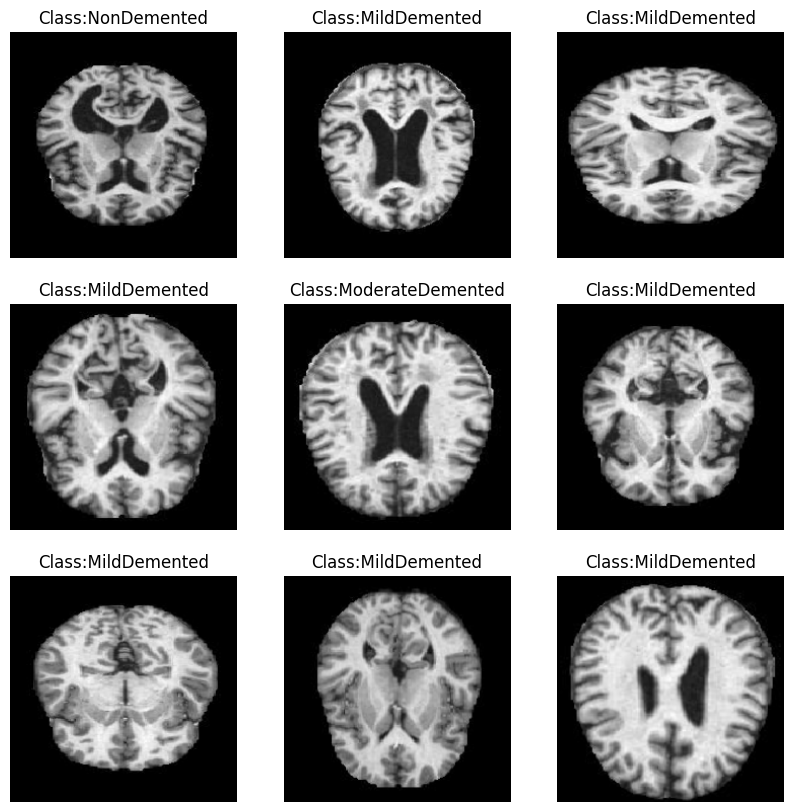

In [ ]:
def show_images(generator, y_pred=None):

    labels = dict(zip([0, 1, 2, 3], CLASSES))

    # Get the next batch of images and labels
    x, y = next(generator)  # Change here: Use next(generator) instead of generator.next()

    # Show a grid of 9 images
    import matplotlib.pyplot as plt
    from random import randint
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, len(x) -1 ) #Change here to prevent index out of range error
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))

    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])], labels[y_pred[i]]))

# Display Train Images
show_images(training_set)

In [ ]:
pip install keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

model1 = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=[176, 176, 3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),

    keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),

    keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.7),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model1 = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=[176, 176, 3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),

    keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),

    keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),

    # The input size of the first dense layer has been changed
    # to match the output size of the Flatten layer (9216)
    keras.layers.Dense(9216, activation='relu'),  # Changed from 512 to 9216
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.7),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model1 = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=[176, 176, 3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),

    keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),

    keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),

    # Adjust the input size of the first dense layer
    keras.layers.Dense(9216, activation='relu'),  # Changed from 512 to 9216
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.7),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=[tf.keras.metrics.CategoricalAccuracy(name='acc'),
                 keras.metrics.AUC(name='auc')]
    )

In [ ]:
# Assuming a 20% validation split
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/train',
    target_size=(176, 176),  # Match input_shape of model1
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify subset as 'training'
)

validation_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/train',
    target_size=(176, 176),  # Match input_shape of model1
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify subset as 'validation'
)

Found 5153 images belonging to 4 classes.
Found 1287 images belonging to 4 classes.


In [ ]:
history = model1.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - acc: 0.5496 - auc: 0.8429 - loss: 0.8947 - val_acc: 0.5144 - val_auc: 0.8242 - val_loss: 1.1430
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 463s 3s/step - acc: 0.5583 - auc: 0.8464 - loss: 0.8862 - val_acc: 0.5416 - val_auc: 0.8388 - val_loss: 0.9183
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - acc: 0.5740 - auc: 0.8542 - loss: 0.8692 - val_acc: 0.5276 - val_auc: 0.8281 - val_loss: 1.1525
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 461s 3s/step - acc: 0.5886 - auc: 0.8559 - loss: 0.8654 - val_acc: 0.5051 - val_auc: 0.7171 - val_loss: 3.6882
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 462s 3s/step - acc: 0.5831 - auc: 0.8622 - loss: 0.8426 - val_acc: 0.1570 - val_auc: 0.3532 - val_loss: 3.1631
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - acc: 0.5997 - auc: 0.8657 - loss: 0.8325 - val_acc: 0.1577 - val_auc: 0.4183 - val_loss: 2.3897
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 472s 3s/step - acc: 0.5978 - auc: 0.8604 - loss: 0.850

In [ ]:
model.save('my_model.h5')

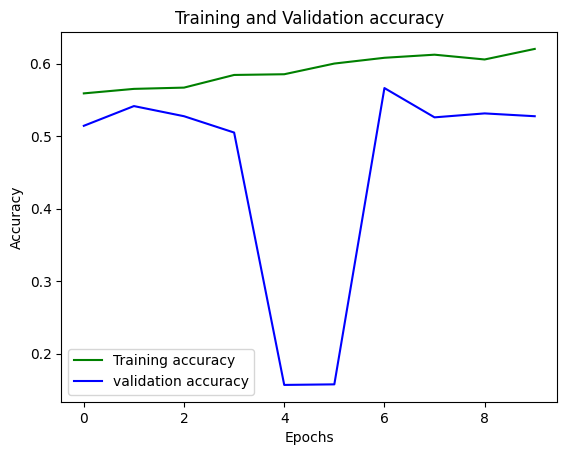

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as 'plt'

acc_train = history.history['acc']
acc_val = history.history['val_acc']
epochs = range(0,10)  # Adjust epochs to match the training epochs (10 in this case)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

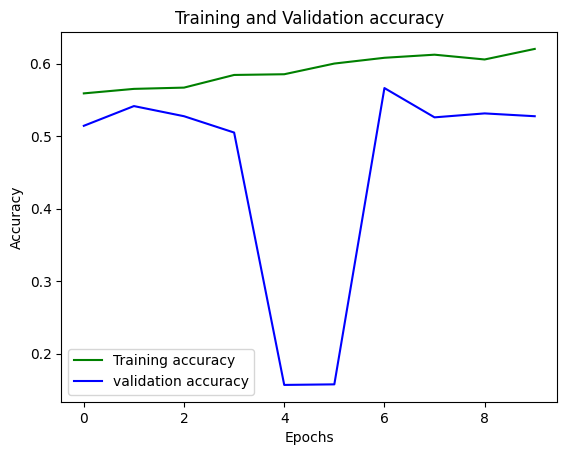

In [ ]:
import matplotlib.pyplot as plt

acc_train = history.history['acc']
acc_val = history.history['val_acc']
epochs = range(len(acc_train))  # Change here: Use the length of acc_train for epochs

plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

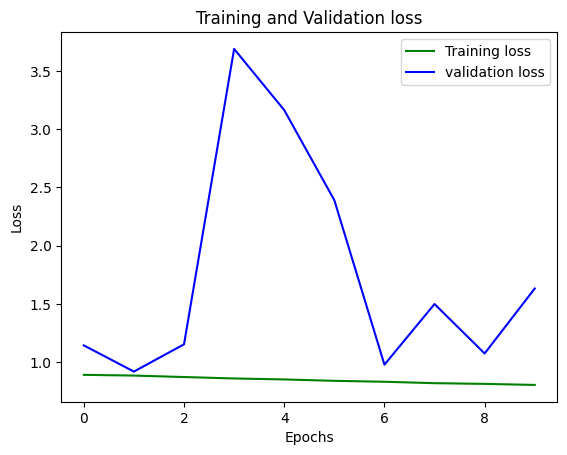

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(len(loss_train))  # Change here: Use the length of loss_train for epochs

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()